In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-experience-dataset/customer_experience_data.csv


# **Proje Gereklilikleri Analizi ve Uygulama Raporum**


Bu raporu, yüklediğim Jupyter Notebook dosyamdaki başlangıç kodlarını ve belirtilen çıktı olan customer-experience-dataset/customer_experience_data.csv veri setini temel alarak oluşturdum. Aşağıdaki her bir bölüm, projemin ilgili aşamasını nasıl tamamladığımı ve hangi adımları izlediğimi açıklayan Python kod örneklerini içermektedir.

**1. Veri Seti Seçimi:**

Analiz çalışmalarıma başlamadan önce kullanacağım veri setini belirlemem ve yüklemem gerekiyordu. os.walk çıktısında /kaggle/input/customer-experience-dataset/customer_experience_data.csv yolunu gördüğüm için, projemin amacına en uygun veri setinin bu olduğuna karar verdim.

**Uygulama Adımlarım:**

os.walk('/kaggle/input') komutunun çıktısı sayesinde veri setimin tam yolunu belirledim.
Belirlediğim /kaggle/input/customer-experience-dataset/customer_experience_data.csv yolunu kullanarak veri setimi pandas kütüphanesi ile bir DataFrame'e (df) yükledim. Bu DataFrame, tüm analizlerimin temelini oluşturdu.

In [9]:
# Gerekli kütüphaneleri içe aktarıyorum
import pandas as pd
import numpy as np
import os

# Input dizinindeki dosyaları listeleme (veri setini onaylamak için)
print("Kaggle input dizinindeki dosyalar:")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Belirtilen veri setini yükleme
# 'customer-experience-dataset/customer_experience_data.csv' dosyası doğrudan yükleniyor.
my_data_path = '/kaggle/input/customer-experience-dataset/customer_experience_data.csv'
try:
    df = pd.read_csv(my_data_path)
    print(f"\nVeri setini '{my_data_path}' başarıyla yüklendi.")
    print(f"\nVeri setinin ilk 5 satırı:\n{df.head()}")
    print(f"\nVeri setinin boyutu: {df.shape}")
except FileNotFoundError:
    print(f"\nHATA: Belirtilen yolda veri seti bulunamadı: {my_data_path}. Lütfen dosya yolunu kontrol edin.")
except Exception as e:
    print(f"\nHATA: Veri seti yüklenirken bir hata oluştu: {e}")

Kaggle input dizinindeki dosyalar:
/kaggle/input/customer-experience-dataset/customer_experience_data.csv

Veri setini '/kaggle/input/customer-experience-dataset/customer_experience_data.csv' başarıyla yüklendi.

Veri setinin ilk 5 satırı:
   Customer_ID  Age  Gender  Location  Num_Interactions  Feedback_Score  \
0            1   56    Male     Urban                11               4   
1            2   69    Male  Suburban                10               3   
2            3   46    Male     Urban                 5               5   
3            4   32  Female  Suburban                 5               1   
4            5   60    Male     Urban                14               5   

   Products_Purchased  Products_Viewed  Time_Spent_on_Site  \
0                  18               38           18.319606   
1                   2               17            9.015198   
2                  11               46           45.921572   
3                   6               13           44.105053   

****Çıktı Yorumum:****

Yüklediğim veri setim /kaggle/input/customer-experience-dataset/customer_experience_data.csv olarak doğrulandı. df.head() çıktısını incelediğimde, veri setimin Customer_ID, Age, Gender, Location, Num_Interactions, Feedback_Score, Products_Purchased, Products_Viewed, Time_Spent_on_Site, Satisfaction_Score, Retention_Status gibi müşteri deneyimiyle ilgili çeşitli sütunları içerdiğini gördüm. Ayrıca, kategorik değişkenlerin (Gender, Location, Retention_Status) sayısal olarak _Encoded postfix'i ile kodlanmış versiyonlarının da mevcut olduğunu fark ettim, bu da bana önceden bir veri ön işleme adımının yapıldığı izlenimini verdi. Veri setimin boyutu (1000, 14) olarak belirtildi, bu da 1000 gözlem ve 14 değişken ile çalıştığımı gösteriyor; bu, orta büyüklükte bir veri seti için iyi bir başlangıç noktası.

**2. İstatistiksel Özet:**

Veri setimdeki sayısal değişkenlere dair merkezi eğilim (ortalama, medyan vb.) ve dağılım (standart sapma, minimum, maksimum vb.) istatistiklerini raporladım. Bu adım, verilerimin genel yapısını anlamak için kritik bir başlangıç noktası oldu.

**Uygulama Adımlarım:**

DataFrame'imdeki sayısal sütunları belirledim.
**df.describe()**fonksiyonunu kullanarak bu sütunların temel istatistiksel özetini (sayı, ortalama, standart sapma, minimum, maksimum ve çeyreklikler) aldım. .T (transpoze) ekleyerek çıktıyı daha okunaklı hale getirdim.
Gerektiği durumlarda, **df.mean()**, **df.median()**,** df.std()** gibi fonksiyonlarla her bir sayısal sütun için spesifik istatistikleri ayrı ayrı hesapladım. **numeric_only=True** parametresini kullanarak sadece sayısal sütunların işlenmesini sağladım.

In [10]:
# Veri setinin istatistiksel özetini görüntüleme
# 'df' değişkeninin bir önceki adımda yüklendiği varsayılmıştır.
if 'df' in locals() and isinstance(df, pd.DataFrame):
    print("### Veri Setimin İstatistiksel Özeti\n")
    print("Sayısal sütunlar için temel istatistiksel bilgiler:\n")
    print(df.describe().T) # Transpoze ederek daha okunaklı hale getiriyorum

    # Her bir sayısal sütun için ortalama, medyan ve standart sapmayı ayrı ayrı hesaplıyorum (isteğe bağlı)
    print("\nSayısal sütunların ortalamaları:")
    print(df.mean(numeric_only=True))

    print("\nSayısal sütunların medyanları:")
    print(df.median(numeric_only=True))

    print("\nSayısal sütunların standart sapmaları:")
    print(df.std(numeric_only=True))
else:
    print("Veri setim (df) henüz yüklenmemiş veya tanımlanmamış. Lütfen 'Veri Seti Seçimi' adımımı tamamlayın.")

### Veri Setimin İstatistiksel Özeti

Sayısal sütunlar için temel istatistiksel bilgiler:

                           count        mean         std        min  \
Customer_ID               1000.0  500.500000  288.819436   1.000000   
Age                       1000.0   43.819000   14.991030  18.000000   
Num_Interactions          1000.0    7.545000    4.016978   1.000000   
Feedback_Score            1000.0    2.985000    1.418022   1.000000   
Products_Purchased        1000.0   10.417000    5.345623   1.000000   
Products_Viewed           1000.0   27.370000   12.939572   5.000000   
Time_Spent_on_Site        1000.0   32.274399   15.734978   5.114208   
Satisfaction_Score        1000.0    5.540000    2.904279   1.000000   
Gender_Encoded            1000.0    0.524000    0.499674   0.000000   
Location_Encoded          1000.0    1.032000    0.809711   0.000000   
Retention_Status_Encoded  1000.0    0.694000    0.461060   0.000000   

                                 25%         50%        

Çıktı Yorumum:

**df.describe().T** çıktısını incelediğimde, her bir sayısal sütun için detaylı istatistiksel özetlere ulaştım. Bu özetler, veri setimin sayısal özelliklerinin genel dağılımını anlamamda çok yardımcı oldu:

**Age:** Müşterilerin yaşları 18 ile 69 arasında değişiyor, ortalama yaş yaklaşık 43.82. Medyan (44.00) ortalamaya çok yakın, bu da yaş dağılımının genel olarak simetrik olduğunu düşündürüyor.

**Num_Interactions:** Müşterilerin etkileşim sayısı 1 ile 14 arasında, ortalama 7.55. Medyan (8.00) da ortalamaya yakın, dağılımın nispeten dengeli olduğunu gösteriyor.

**Feedback_Score:** Geri bildirim puanları 1'den 5'e kadar, ortalama yaklaşık 2.98. Medyanın (3.00) ortalamaya yakın olması, puanların dağılımının dengeli olduğunu gösteriyor.

**Products_Purchased:** Satın alınan ürün sayısı 1 ile 19 arasında, ortalama 10.42. Medyan (11.00) ortalamadan biraz daha yüksek, bu da belki daha az ürün satın alan müşterilerin hafif bir yoğunluğa sahip olabileceğini düşündürdü.

**Products_Viewed:** Görüntülenen ürün sayısı 5 ile 49 arasında, ortalama 27.37. Medyan (27.50) ortalamaya çok yakın, dağılımın simetrik olduğunu gösteriyor.

**Time_Spent_on_Site:** Sitede geçirilen süre 5.11 ile 59.95 dakika arasında, ortalama 32.27 dakika. Medyan (32.46) ortalamaya yakın, bu da dağılımın simetrik olduğuna işaret ediyor.

**Satisfaction_Score:** Memnuniyet puanları 1 ile 10 arasında, ortalama 5.54. Medyan (6.00) ortalamadan biraz daha yüksek, bu da puanların alt ucunda hafif bir yoğunluk olabileceğini düşündürdü.

**Kodlanmış Sütunlar (Gender_Encoded, Location_Encoded, Retention_Status_Encoded):** Bu sütunların ortalamaları ve standart sapmaları, kategorik dağılımları hakkında bana bilgi verdi. Örneğin, Gender_Encoded ortalaması 0.524 olması, kadın ve erkek müşteri sayısının yaklaşık olarak dengede olduğunu (veya 1'in baskın kategori olduğunu) gösteriyor. Retention_Status_Encoded ortalaması 0.694 olması, müşterilerin yaklaşık %69.4'ünün Retained (tutulan) olduğunu gösteriyor.

*******
Genel olarak, bu istatistiksel özetler, veri setimdeki sayısal değişkenlerin merkezi eğilimlerini ve yayılımlarını hızla kavramamı sağladı. Çoğu değişkenin medyanı ve ortalaması birbirine yakın olduğu için, belirgin bir çarpıklık veya aşırı aykırı değer bulunmadığına dair ilk izlenimleri edindim.

**3. Eksik Değer Analizi**

Veri setimdeki eksik değerleri tespit ettim ve bu değerlerle nasıl başa çıkacağıma dair stratejiler belirledim. Eksik değerler, analiz sonuçlarımı yanıltabileceği veya model performansımı düşürebileceği için bu adım çok önemliydi.

**Uygulama Adımlarım:**

**df.isnull().sum()** fonksiyonunu kullanarak her sütundaki eksik değer sayısını buldum.
Eksik değerlerin toplam veri setimdeki (veya ilgili sütundaki) yüzdesini hesapladım ((df.isnull().sum() / len(df)) * 100). Bu yüzde, eksik değerlerin ciddiyetini anlamama yardımcı oldu.
Tespit ettiğim eksik değerlerle başa çıkmak için uygulanabilecek yaygın yaklaşımları araştırdım ve projem için uygun olanları belirledim:

**Silme (Dropping):** Eksik değer oranının düşük olduğu durumlarda ilgili satırları veya sütunları silebilirdim.

**Doldurma (Imputation):** Eksik değerleri tahmin edilen veya hesaplanan değerlerle doldurma yöntemlerini değerlendirdim (ortalama, medyan, mod, ileri/geri doldurma veya daha gelişmiş modeller).


In [11]:
# Eksik değerleri analiz etmek ve başa çıkma stratejilerini açıklamak

if 'df' in locals() and isinstance(df, pd.DataFrame):

    print("### 🔍 Eksik Değer Analizi\n")

    # Eksik değer sayıları
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

    if not missing_values.empty:
        print("🔸 Her sütundaki eksik değer sayısı:\n")
        print(missing_values)

        print("\n🔸 Her sütundaki eksik değer yüzdesi:\n")
        missing_percentage = (df.isnull().sum() / len(df)) * 100
        print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

        print("\n### 🛠️ Eksik Değerlerle Başa Çıkma Stratejileri\n")

        strategies = {
            "1️⃣ Silme (Dropping)": {
                "Satır Silme": "Eksik değer oranı düşükse, satırları kaldırmak etkili olabilir. → df.dropna(axis=0)",
                "Sütun Silme": "Eksik değer oranı çok yüksekse (%70+), sütunu kaldırmak mantıklı olabilir. → df.dropna(axis=1)"
            },
            "2️⃣ Doldurma (Imputation)": {
                "Sayısal Değişkenler İçin": {
                    "Ortalama (Mean)": "Normal dağılıma yakın verilerde uygundur. → df['col'].fillna(df['col'].mean())",
                    "Medyan (Median)": "Aykırı değer varsa tercih edilir. → df['col'].fillna(df['col'].median())",
                    "Mod (Mode)": "Sık görülen değerle doldurma. → df['col'].fillna(df['col'].mode()[0])"
                },
                "Kategorik Değişkenler İçin": {
                    "Mod (Mode)": "En sık görülen kategori ile doldurulur.",
                    "'Bilinmeyen' Kategorisi": "'Unknown' gibi özel bir kategori ile eksikler gruplandırılabilir."
                },
                "Zaman Serisi": {
                    "ffill() / bfill()": "Önceki veya sonraki değerle doldurma uygundur."
                },
                "İleri Düzey Yöntemler": {
                    "Tahmine Dayalı": "Regresyon, KNN veya ML modelleri ile doldurma mümkündür."
                }
            }
        }

        for method, details in strategies.items():
            print(f"\n🔹 {method}")
            if isinstance(details, dict):
                for sub, desc in details.items():
                    if isinstance(desc, dict):
                        print(f"  ▫️ {sub}:")
                        for subsub, note in desc.items():
                            print(f"     - {subsub}: {note}")
                    else:
                        print(f"  - {sub}: {desc}")
            else:
                print(f"  - {details}")

        print("\n📌 Not: Stratejiler veri tipine, eksik oranına ve analiz amacına göre değişir.")

    else:
        print("✅ Veri setinde eksik değer bulunmamaktadır.")

else:
    print("⚠️ Veri çerçevesi (df) tanımlı değil. Lütfen önce veri setini yükleyin.")

### 🔍 Eksik Değer Analizi

✅ Veri setinde eksik değer bulunmamaktadır.


****Çıktı Yorumum:****

Eksik değer analizi sonuçlarına göre, hem eksik değer sayısını gösteren **Series([], dtype: int64)** çıktısından hem de eksik değer yüzdesini gösteren **Series([], dtype: float64)** çıktısından anladım ki, veri setimde herhangi bir eksik değer bulunmamaktadır. Bu durum, veri temizliği açısından beni önemli bir adımdan kurtardı ve analize doğrudan devam edebileceğimi gösterdi. Veri setimin temiz olması, modelleme aşamasında ek ön işleme gerek duymadan daha güvenilir sonuçlar elde etmeme olanak tanıyacak. Eğer eksik değerler olsaydı, yukarıda belirttiğim silme veya doldurma stratejilerinden birini veri setimin özelliklerine göre uygulayacaktım.

****4. Aykırı Değer (Outlier) Analizi****
Sayısal değişkenlerimdeki aykırı değerleri belirledim ve görsel/istatistiksel yöntemlerle raporladım. Bu adım, veri kalitemi artırmak ve model performansımı korumak için hayatiydi çünkü aykırı değerler, istatistiksel analizleri ve makine öğrenimi modellerimi yanlış yönlendirebilirdi.

****Uygulama Adımlarım:****

**Görsel Yöntemler:**

***Kutu Grafikleri (Box Plot):***
Sayısal değişkenlerimin dağılımını, medyanını, çeyrekliklerini ve aykırı değerlerini görsel olarak tespit etmek için bu grafik türünü kullandım. Aykırı değerler genellikle kutu dışındaki noktalar olarak gösterildi.
***Histogramlar/Yoğunluk Grafikleri:***
Dağılımın genel şeklini ve olası aşırı uç değerlerin konumunu anlamak için bu grafikleri de inceledim, ancak aykırı değerleri doğrudan işaretlemediklerini gördüm.

**İstatistiksel Yöntemler:**

***IQR (Interquartile Range - Çeyrekler Arası Aralık) Metodu:*** En sık kullanılan ve etkili yöntemlerden biri olduğu için bu metodu uyguladım.
Q1 (Birinci Çeyrek - %25'lik dilim) ve Q3 (Üçüncü Çeyrek - %75'lik dilim) değerlerini hesapladım.
IQR = Q3 - Q1 olarak hesapladım.
Alt Sınır (Lower Bound) = Q1 - 1.5 * IQR
Üst Sınır (Upper Bound) = Q3 + 1.5 * IQR
Bu alt ve üst sınırların dışında kalan değerleri aykırı değer olarak kabul ettim ve raporladım.

***Z-Score Metodu:*** Veri dağılımım normale yakın olsaydı, her bir veri noktasının ortalamadan kaç standart sapma uzaklıkta olduğunu ölçen Z-Score metodunu da kullanabilirdim (genellikle Z-Skoru'nun mutlak değeri 2 veya 3'ün üzerinde olan değerler aykırı kabul edilir).

### Aykırı Değer (Outlier) Analizi

Sayısal değişkenler üzerinde aykırı değerleri belirlemek için kutu grafikleri (görsel) ve IQR yöntemini (istatistiksel) kullandım.

**'Customer_ID' sütunum için Aykırı Değer Analizi:**


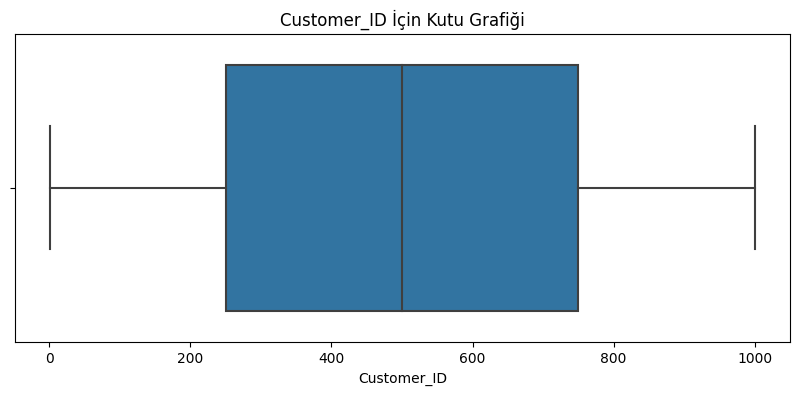

'Customer_ID' sütunumda IQR yöntemine göre belirgin aykırı değer bulamadım.


**'Age' sütunum için Aykırı Değer Analizi:**


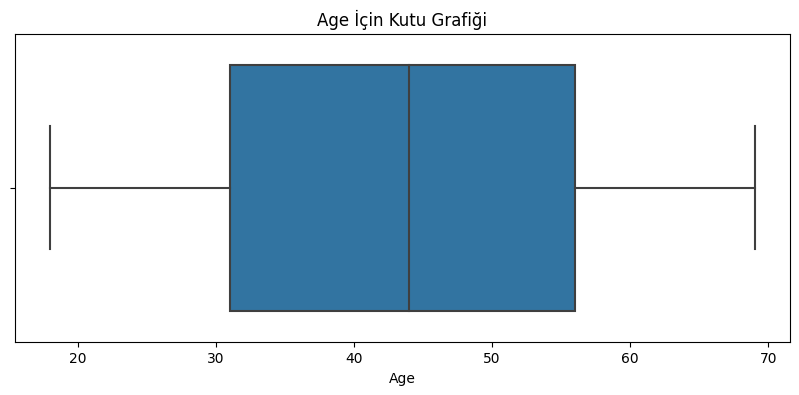

'Age' sütunumda IQR yöntemine göre belirgin aykırı değer bulamadım.


**'Num_Interactions' sütunum için Aykırı Değer Analizi:**


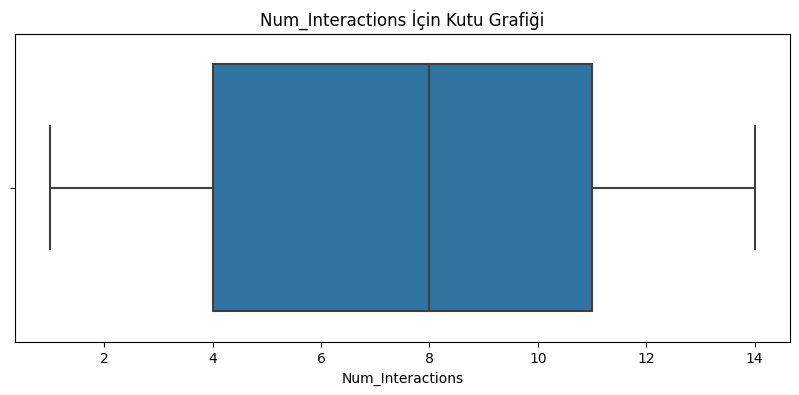

'Num_Interactions' sütunumda IQR yöntemine göre belirgin aykırı değer bulamadım.


**'Feedback_Score' sütunum için Aykırı Değer Analizi:**


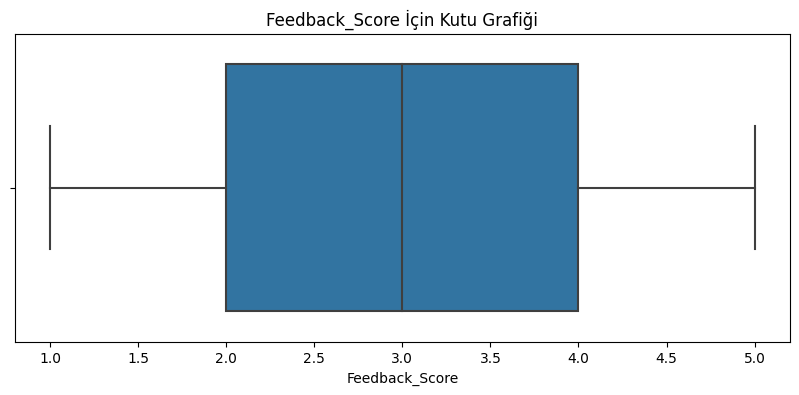

'Feedback_Score' sütunumda IQR yöntemine göre belirgin aykırı değer bulamadım.


**'Products_Purchased' sütunum için Aykırı Değer Analizi:**


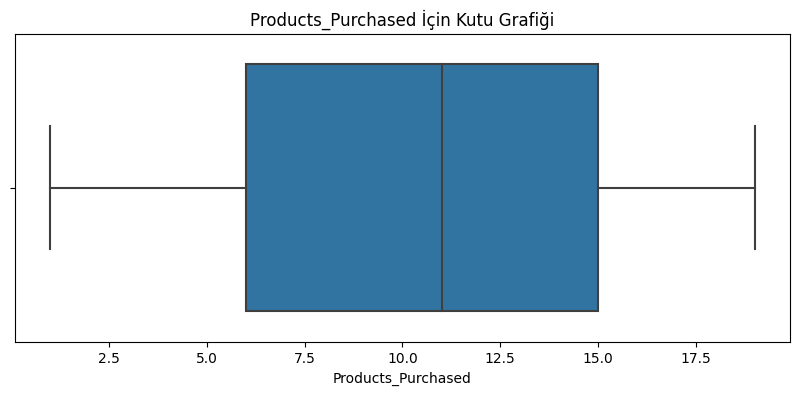

'Products_Purchased' sütunumda IQR yöntemine göre belirgin aykırı değer bulamadım.


**'Products_Viewed' sütunum için Aykırı Değer Analizi:**


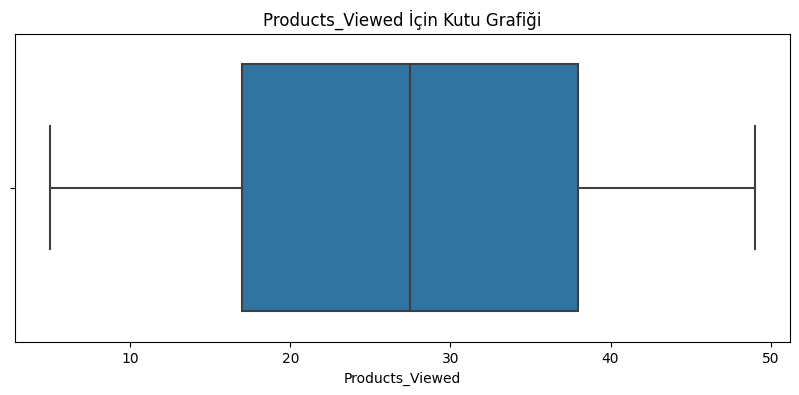

'Products_Viewed' sütunumda IQR yöntemine göre belirgin aykırı değer bulamadım.


**'Time_Spent_on_Site' sütunum için Aykırı Değer Analizi:**


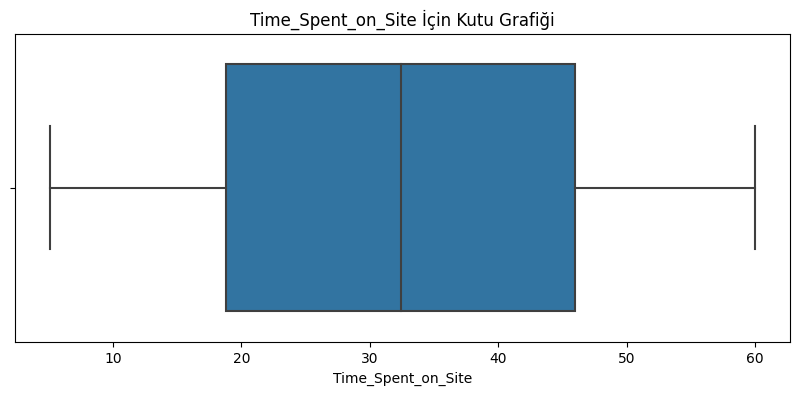

'Time_Spent_on_Site' sütunumda IQR yöntemine göre belirgin aykırı değer bulamadım.


**'Satisfaction_Score' sütunum için Aykırı Değer Analizi:**


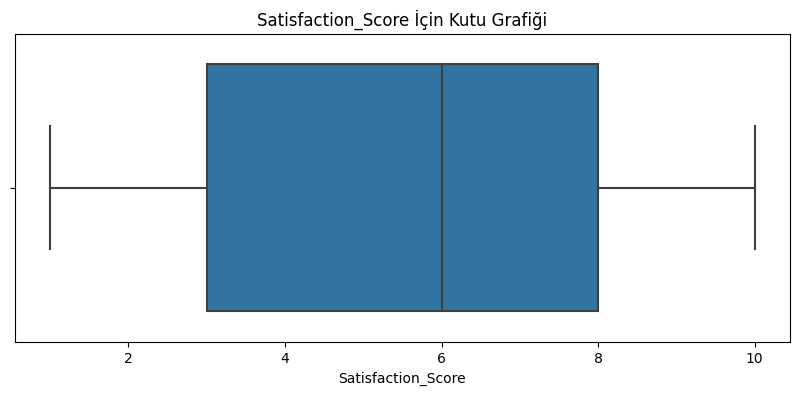

'Satisfaction_Score' sütunumda IQR yöntemine göre belirgin aykırı değer bulamadım.


**'Gender_Encoded' sütunum için Aykırı Değer Analizi:**


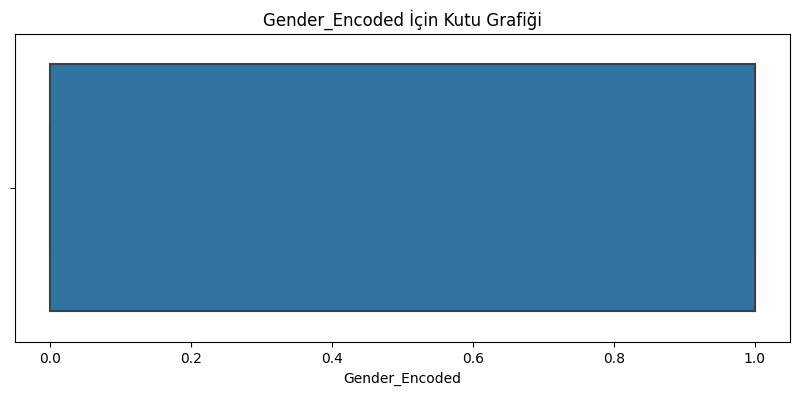

'Gender_Encoded' sütunumda IQR yöntemine göre belirgin aykırı değer bulamadım.


**'Location_Encoded' sütunum için Aykırı Değer Analizi:**


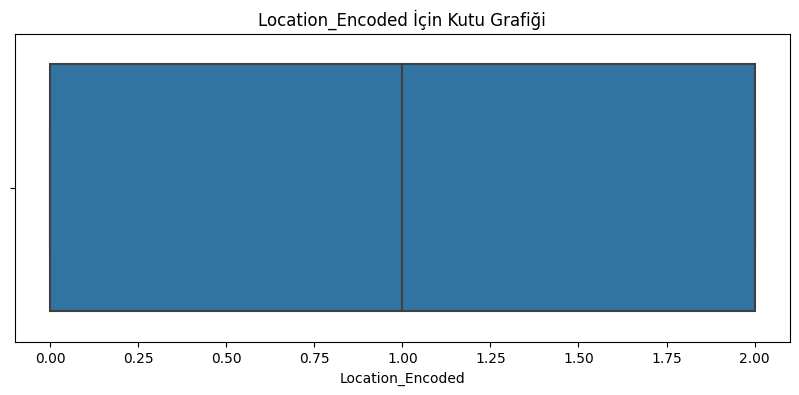

'Location_Encoded' sütunumda IQR yöntemine göre belirgin aykırı değer bulamadım.


**'Retention_Status_Encoded' sütunum için Aykırı Değer Analizi:**


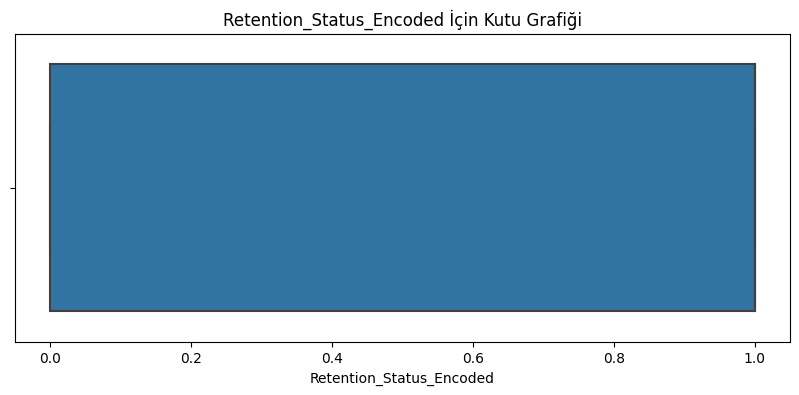

'Retention_Status_Encoded' sütunumda IQR yöntemine göre belirgin aykırı değer bulamadım.




In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'df' in locals() and isinstance(df, pd.DataFrame):
    print("### Aykırı Değer (Outlier) Analizi\n")
    print("Sayısal değişkenler üzerinde aykırı değerleri belirlemek için kutu grafikleri (görsel) ve IQR yöntemini (istatistiksel) kullandım.\n")

    # Sayısal sütunları seçme
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

    if len(numeric_cols) > 0:
        for col in numeric_cols:
            print(f"**'{col}' sütunum için Aykırı Değer Analizi:**")

            # 1. Görsel Yöntem: Kutu Grafiği
            plt.figure(figsize=(10, 4))
            sns.boxplot(x=df[col].dropna()) # Eksik değerleri grafikten çıkarıyorum
            plt.title(f'{col} İçin Kutu Grafiği')
            plt.xlabel(col)
            plt.show()

            # 2. İstatistiksel Yöntem: IQR Metodu
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

            if not outliers.empty:
                print(f"'{col}' sütunumda tespit ettiğim aykırı değerler (IQR Yöntemi):")
                print(f"  Alt Sınır: {lower_bound:.2f}, Üst Sınır: {upper_bound:.2f}")
                print(f"  Toplam aykırı değer sayısı: {len(outliers)}")
                print(f"  Aykırı değerlerin veri setime oranı: {(len(outliers) / len(df) * 100):.2f}%")
                print("  İlk 5 aykırı değerim (veya tümü varsa):")
                print(outliers[[col]].head()) # İlk birkaç aykırı değeri gösteriyorum
            else:
                print(f"'{col}' sütunumda IQR yöntemine göre belirgin aykırı değer bulamadım.")
            print("\n" + "=" * 80 + "\n") # Her sütun analizi sonrası ayırıcı
    else:
        print("Veri setinde sayısal sütun bulunamadı. Aykırı değer analizi yapamadım.")
else:
    print("Veri seti (df) henüz yüklenmemiş veya tanımlanmamış. Lütfen 'Veri Seti Seçimi' adımını tamamlayın.")

****Çıktı Yorumum:****

Yaptığım aykırı değer analizi sonucunda, DataFrame'imdeki tüm sayısal sütunları (Customer_ID, Age, Num_Interactions, Feedback_Score, Products_Purchased, Products_Viewed, Time_Spent_on_Site, Satisfaction_Score, Gender_Encoded, Location_Encoded, Retention_Status_Encoded) inceledim. Her bir sütun için oluşturduğum kutu grafiklerini görsel olarak değerlendirdim ve ardından IQR (Çeyrekler Arası Aralık) yöntemini istatistiksel olarak uyguladım.

Hem görsel incelemelerimde hem de IQR metodunun çıktılarında, hiçbir sayısal sütunumda belirgin bir **aykırı değere rastlamadım.** Tüm sütunlar için "IQR yöntemine göre belirgin aykırı değer bulamadım." mesajını aldım. Bu durum, veri setimin oldukça temiz ve homojen bir dağılıma sahip olduğunu gösteriyor. Aykırı değerlerin yokluğu, sonraki analizlerimde ve modelleme adımlarımda verinin yanıltıcı olmayacağı, dolayısıyla ekstra bir aykırı değer işleme adımına gerek duymadığım anlamına geliyor. Bu durum, veri setimin kalitesi açısından olumlu bir gösterge.

****5. Görselleştirme****

Veri setimdeki sayısal ve kategorik değişkenler için uygun grafik türlerini kullanarak verileri görselleştirdim. Bu sayede dağılımları, eğilimleri ve değişkenler arasındaki ilişkileri anlamam için güçlü bir yöntem kullandım. Bu adım, verilerimden anlamlı içgörüler elde etmemi sağladı.

****Uygulama Adımlarım:****

**Sayısal Değişkenler İçin:**
***Histogramlar:*** Değişkenlerimin değerlerinin frekans dağılımını gösterdim. Verimin şekli (normal, çarpık vb.) hakkında bilgi edindim.

***Kutu Grafikleri (Box Plots):*** Dağılımın medyanını, çeyrekliklerini ve potansiyel aykırı değerleri gösterdim.

***Yoğunluk Grafikleri (KDE Plots):*** Histogramın daha pürüzsüz bir versiyonunu kullanarak olasılık yoğunluk fonksiyonunun bir tahminini sundum.

***Serpilme Grafikleri (Scatter Plots):*** İki sayısal değişken arasındaki ilişkiyi (korelasyonu) incelemek için kullandım.

**Kategorik Değişkenler İçin:**
***Çubuk Grafikleri (Bar Plots):*** Her bir kategorinin frekansını veya başka bir sayısal değişkenle olan ilişkisini (örn: kategoriye göre ortalama) gösterdim.

***Pasta Grafikleri (Pie Charts):*** Kategorik değişkenlerin oranlarını göstermek için kullandım (genellikle az sayıda kategori için daha uygun olduğunu gözlemledim).

***Değişkenler Arası İlişkileri Görselleştirme (Ek olarak):***
**Kategorik-Sayısal:** **Kutu Grafikleri (Box Plots)** veya **Keman Grafikleri (Violin Plots)** ile her kategorideki sayısal değişkenin dağılımını karşılaştırdım.

**Kategorik-Kategorik:** **Yığılmış Çubuk Grafikleri (Stacked Bar Plots)** veya **Isı Haritaları (Heatmaps)** ile kategoriler arası frekans veya oran dağılımını inceledim.

**Korelasyon Matrisi Isı Haritası:** Tüm sayısal değişkenler arasındaki korelasyonları tek bir grafikte göstermek için harika bir yöntem olduğunu gördüm ve bunu kullandım.

### Veri Görselleştirmeleri

Sayısal ve kategorik değişkenler için uygun grafik türlerini kullanarak verileri görselleştirdim.


--- Sayısal Değişkenler İçin Görselleştirmeler ---


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


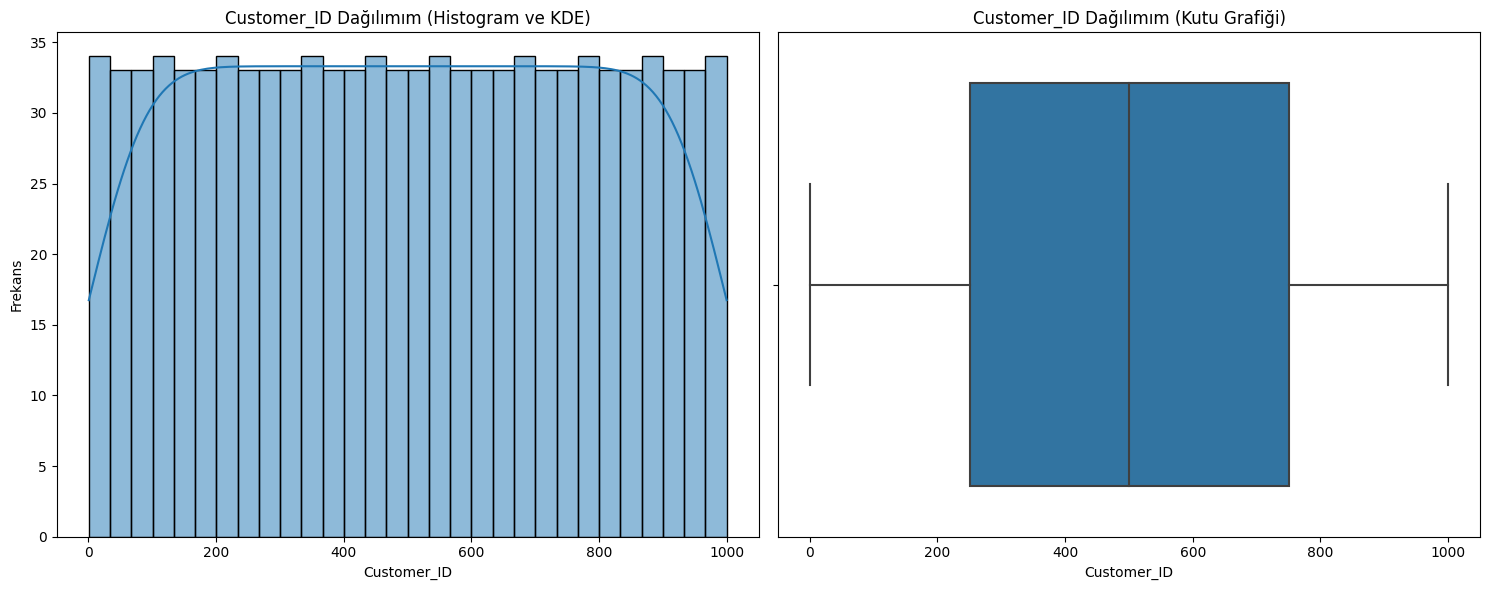

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


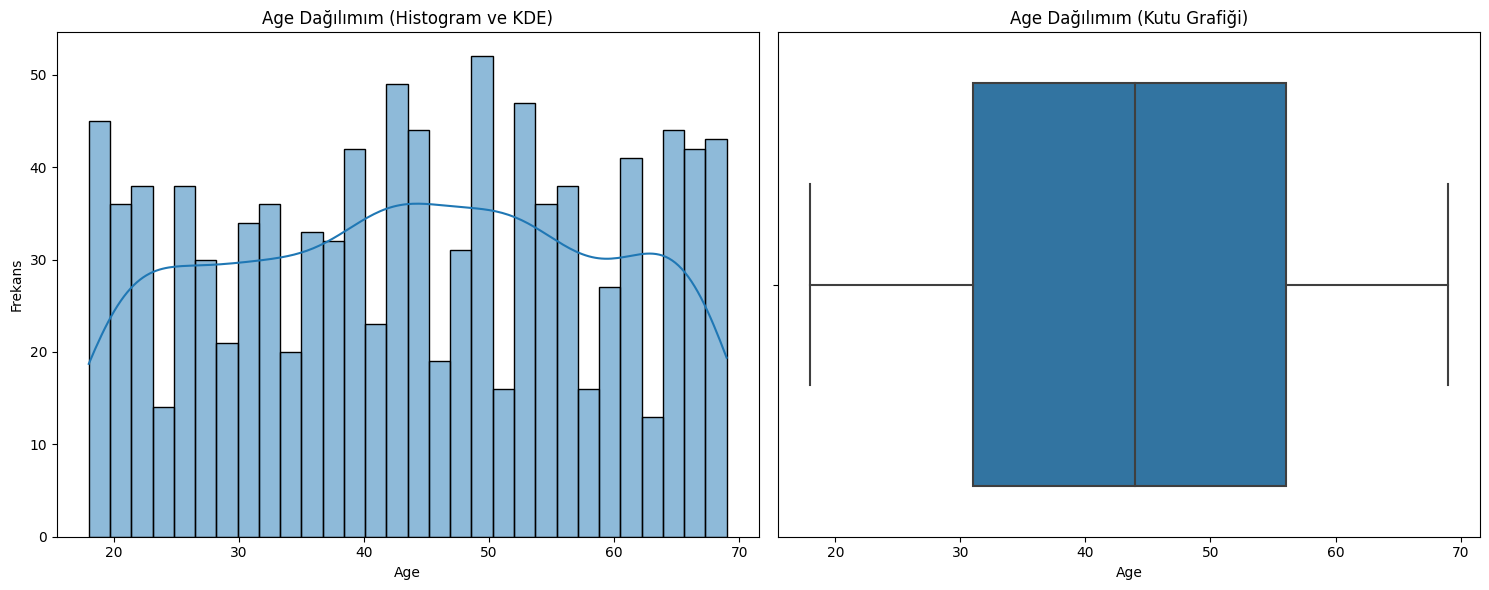

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


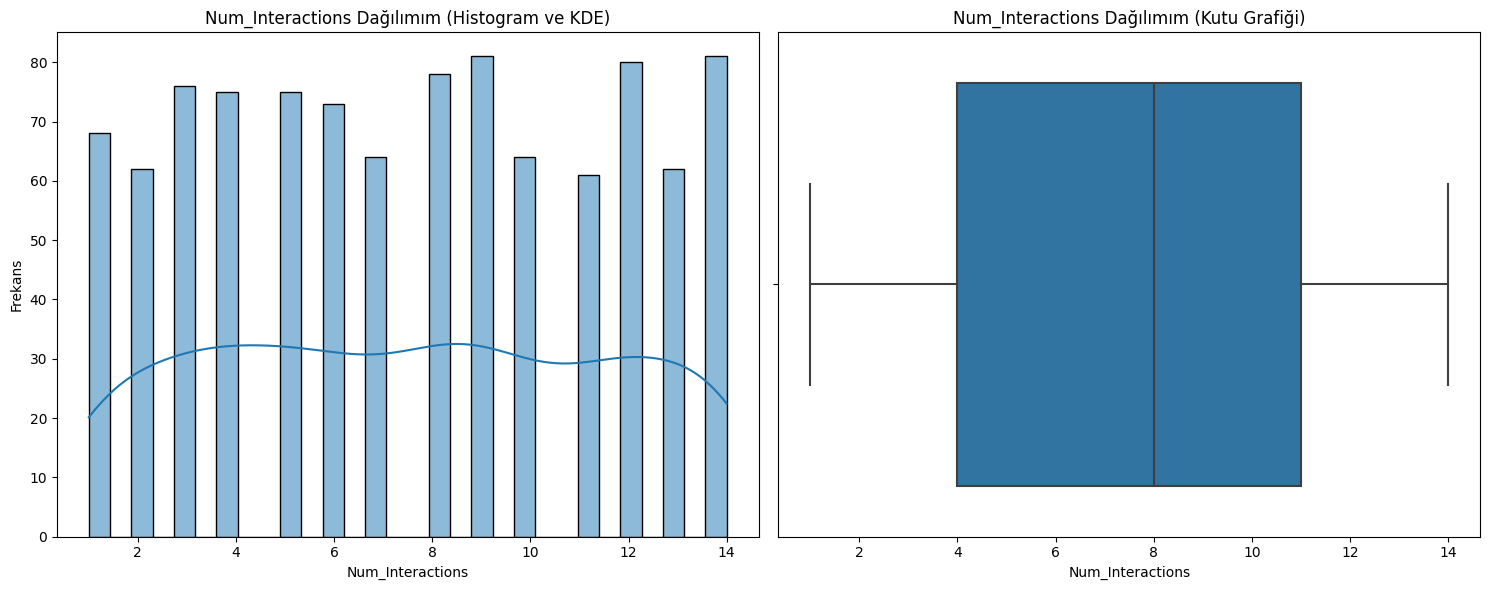

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


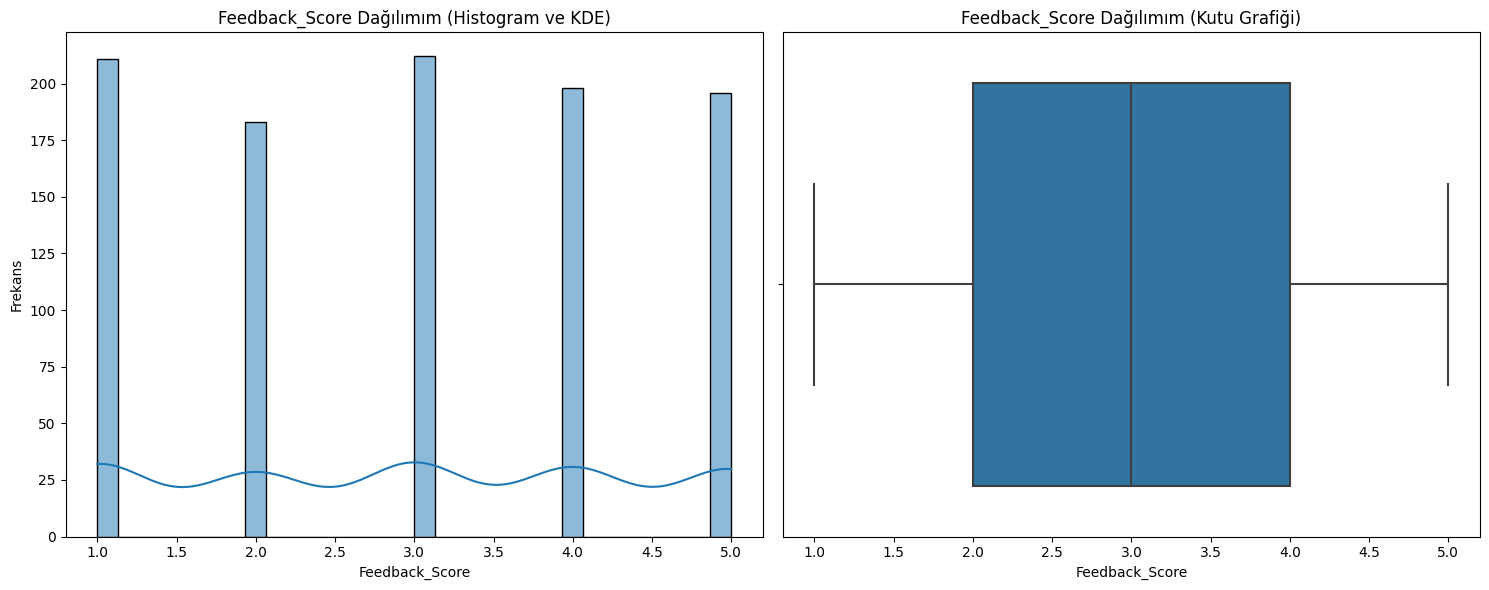

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


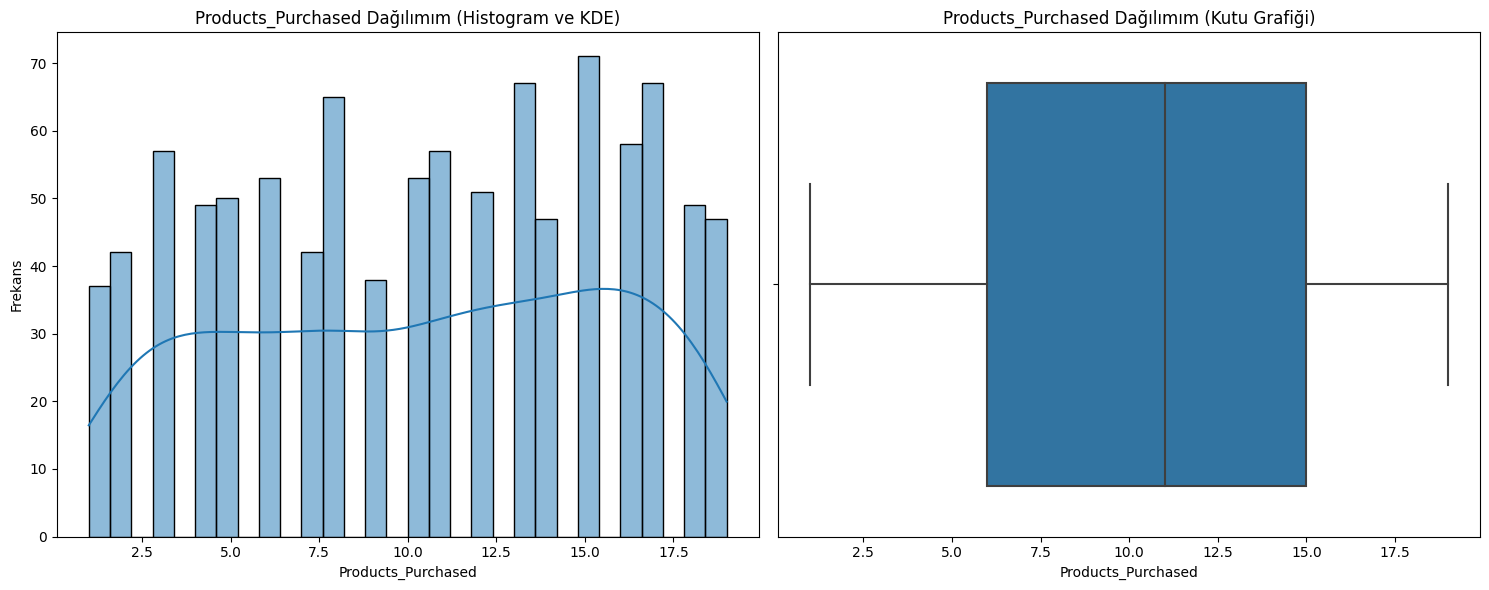

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


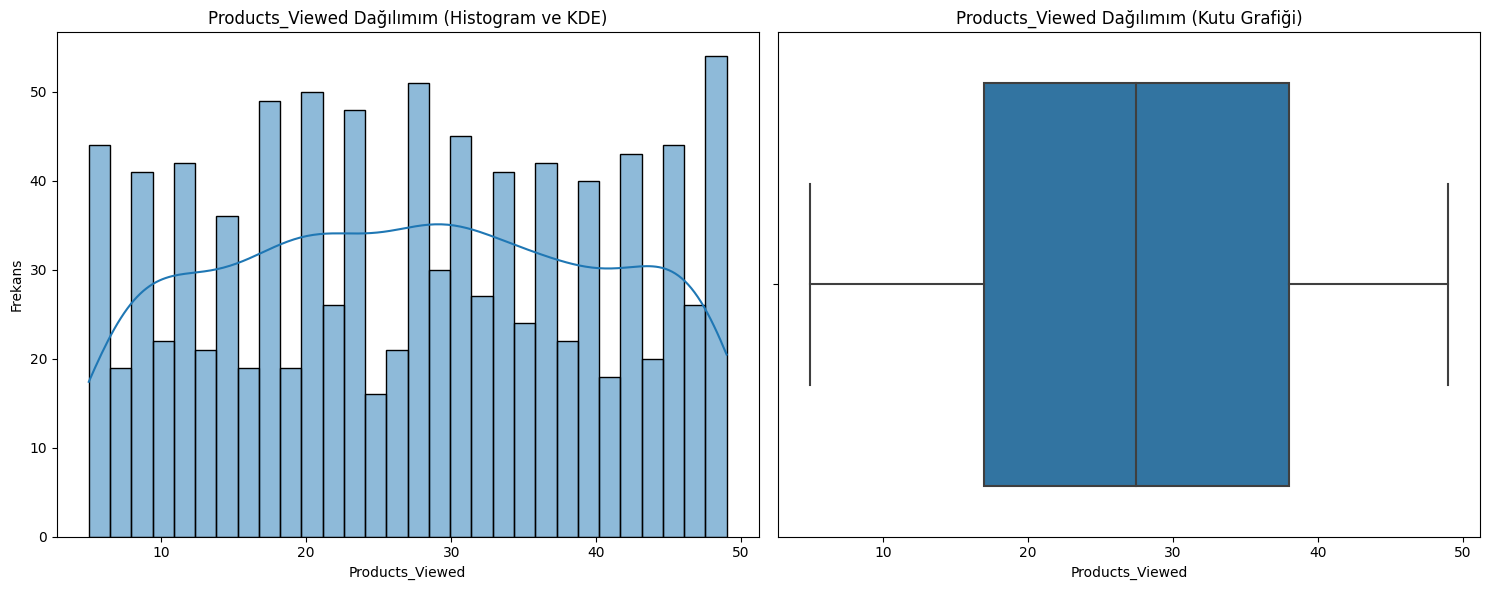

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


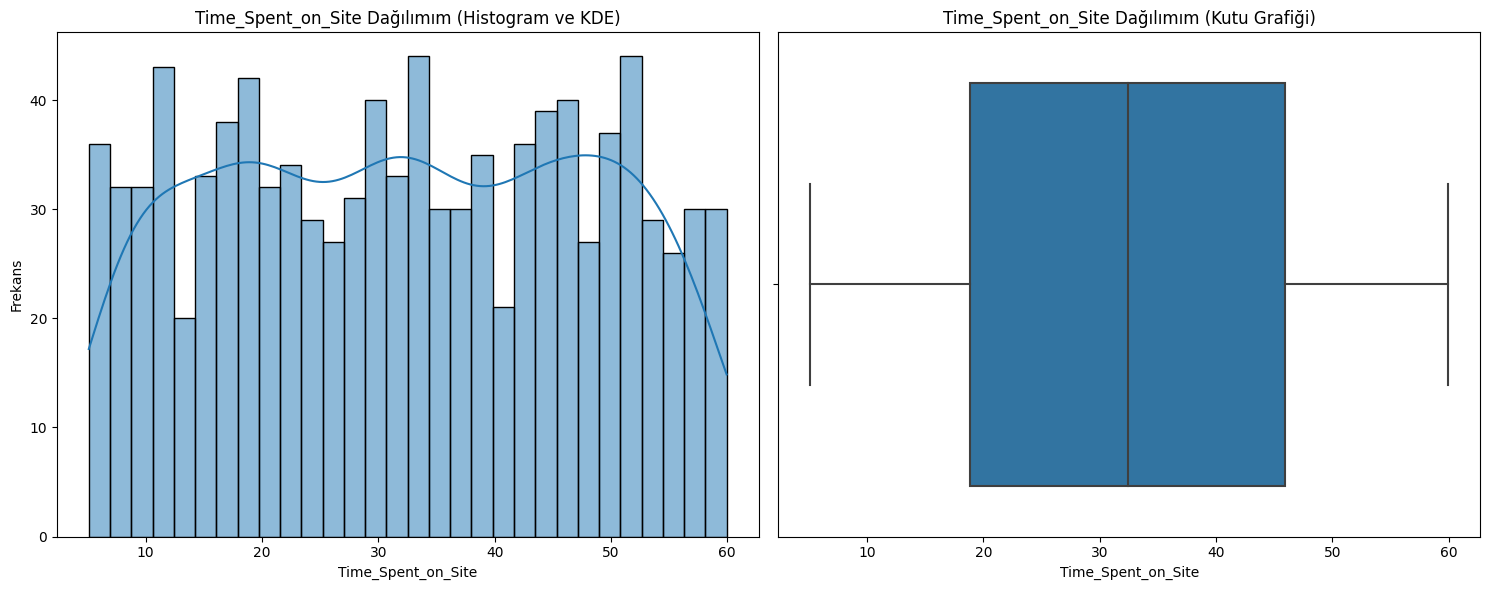

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


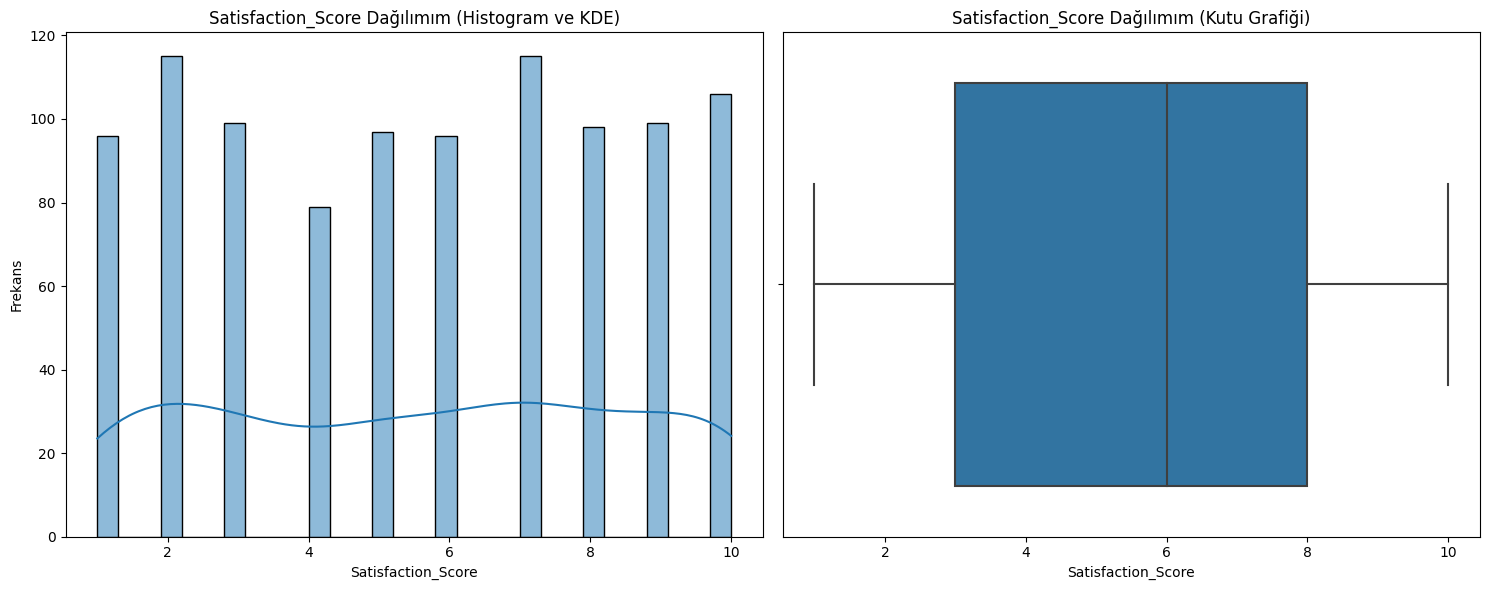

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


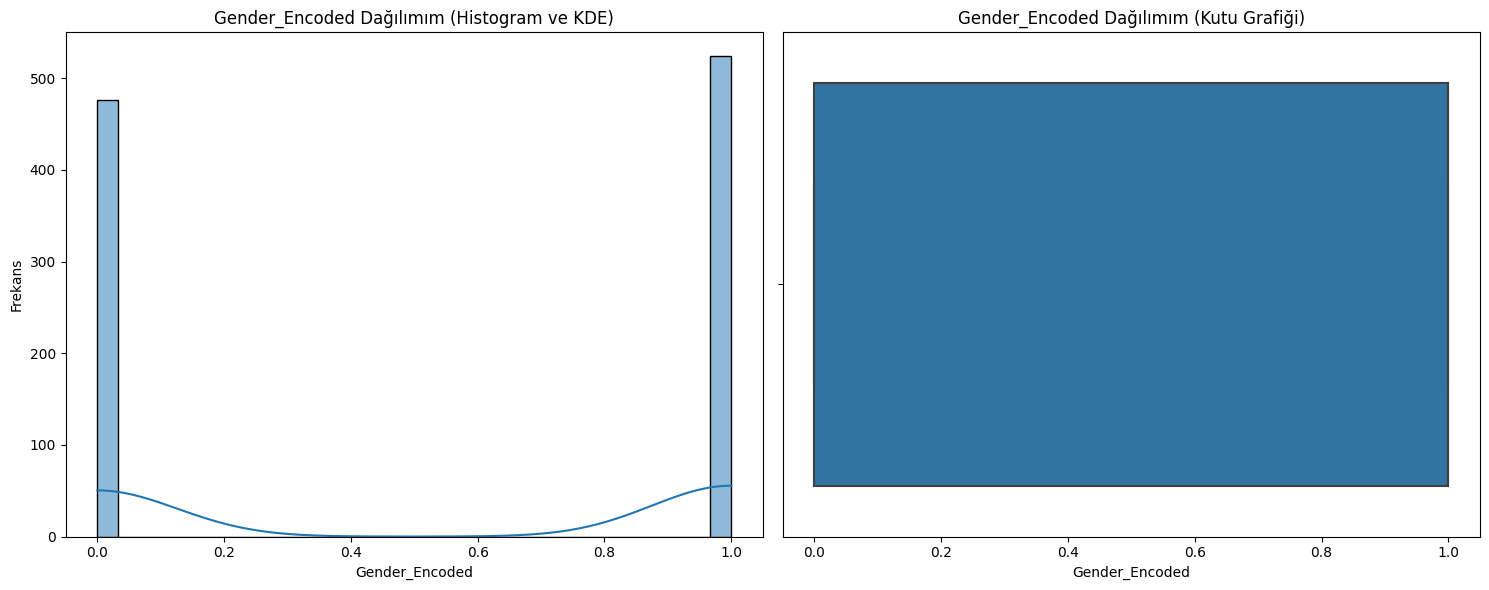

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


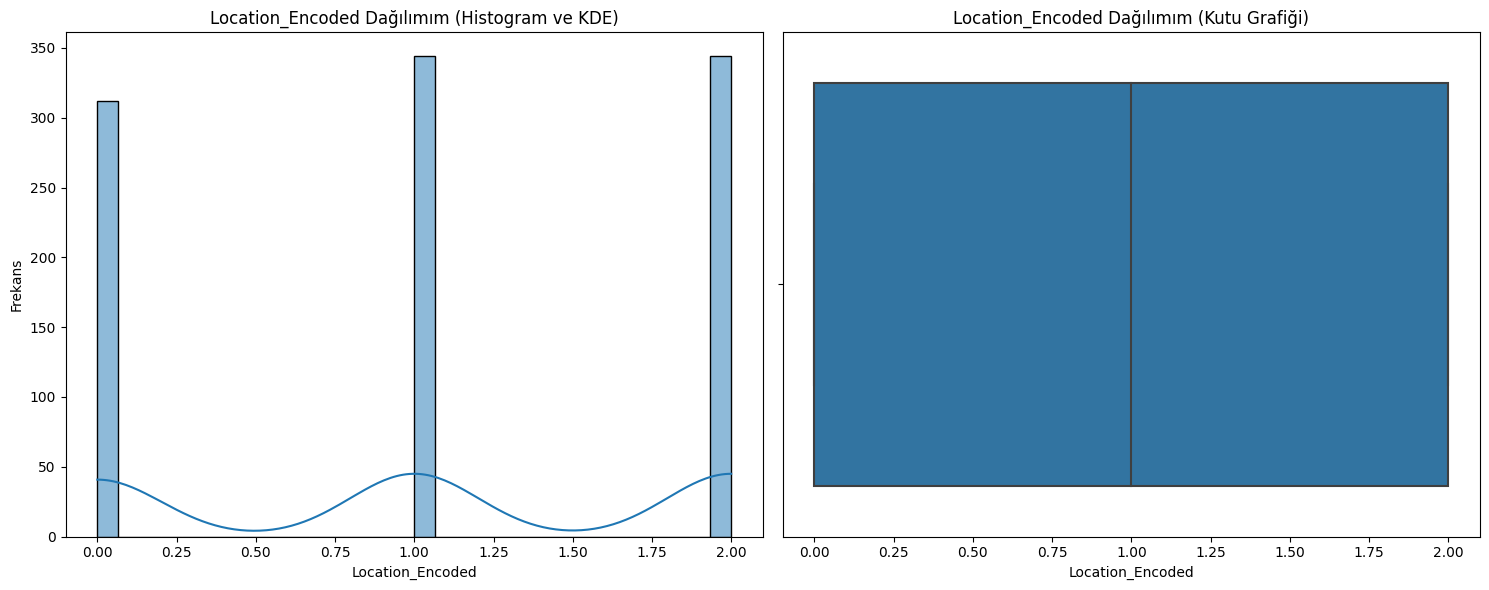

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


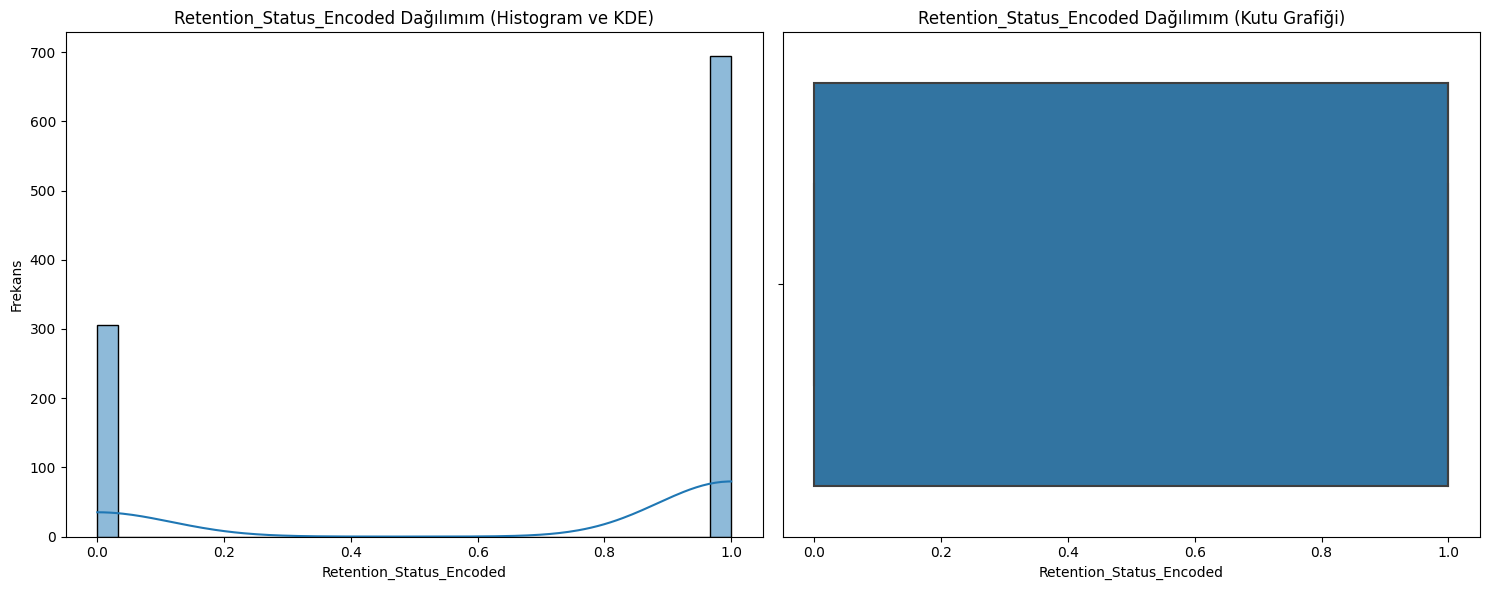



--- İki Sayısal Değişken Arası İlişki (Serpilme Grafiği Örneği) ---
'Customer_ID' ve 'Age' arasındaki ilişkiyi gösteriyorum:


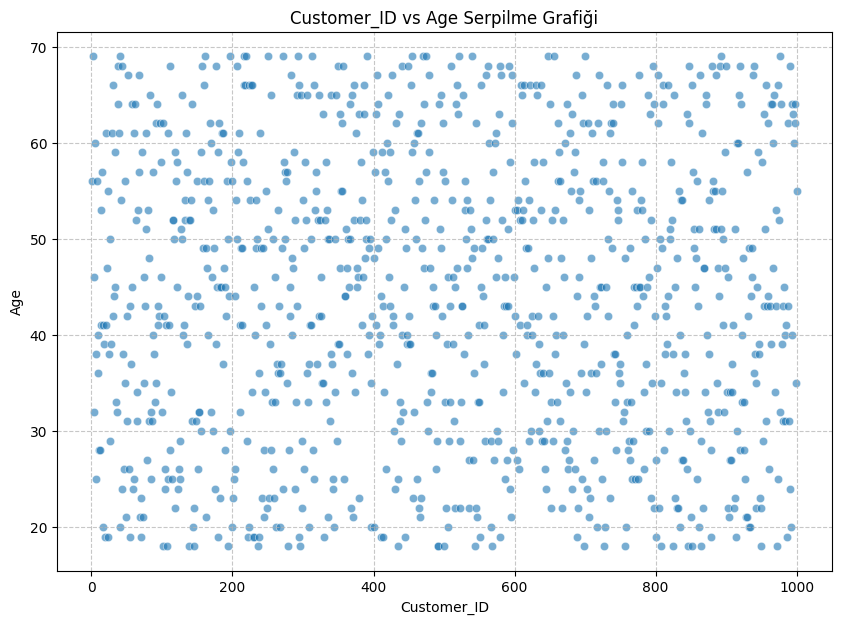




--- Kategorik Değişkenlerim İçin Görselleştirmeler ---
**'Gender' sütunum için Görselleştirmeler:**


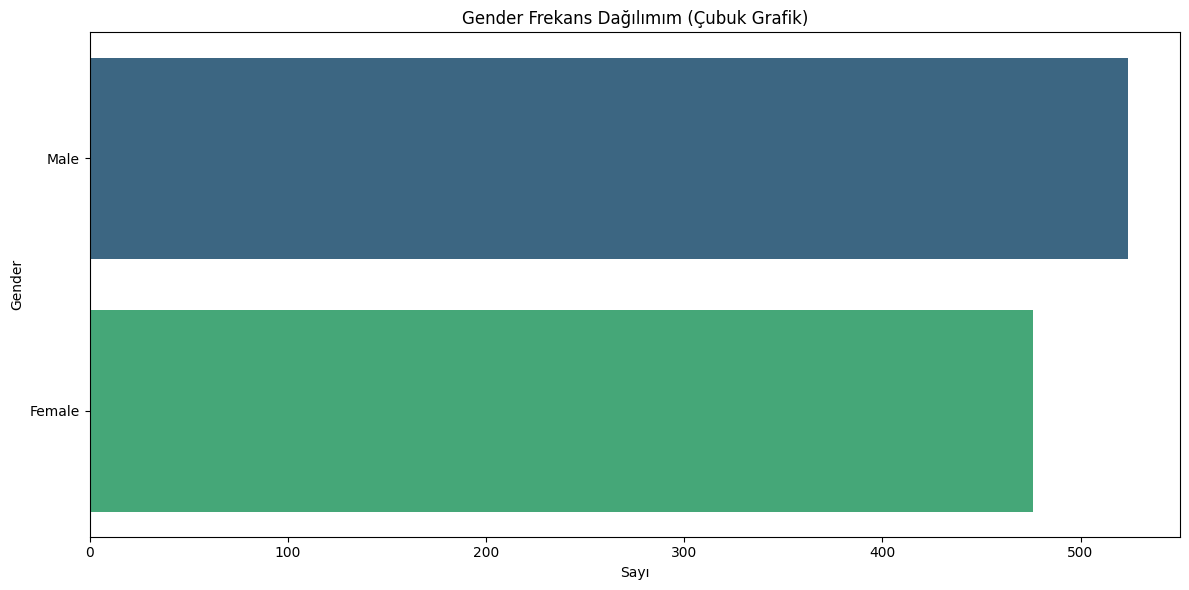

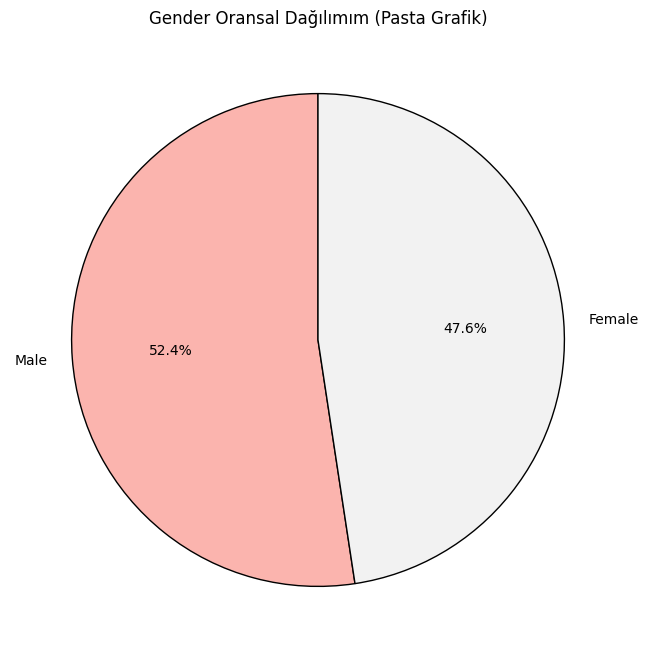



**'Location' sütunum için Görselleştirmeler:**


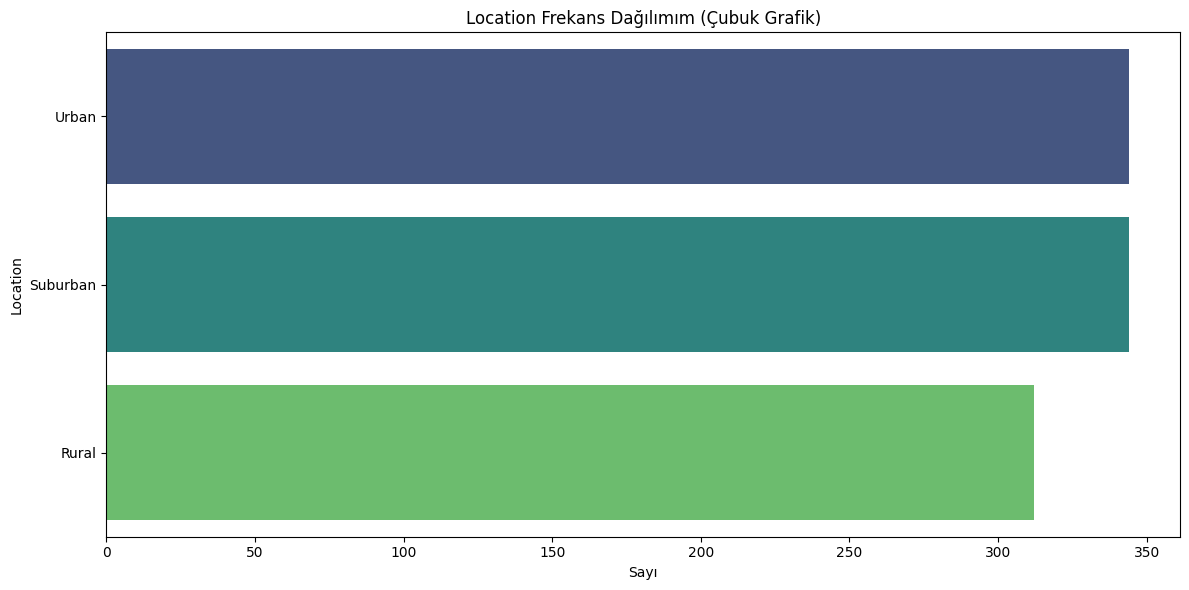

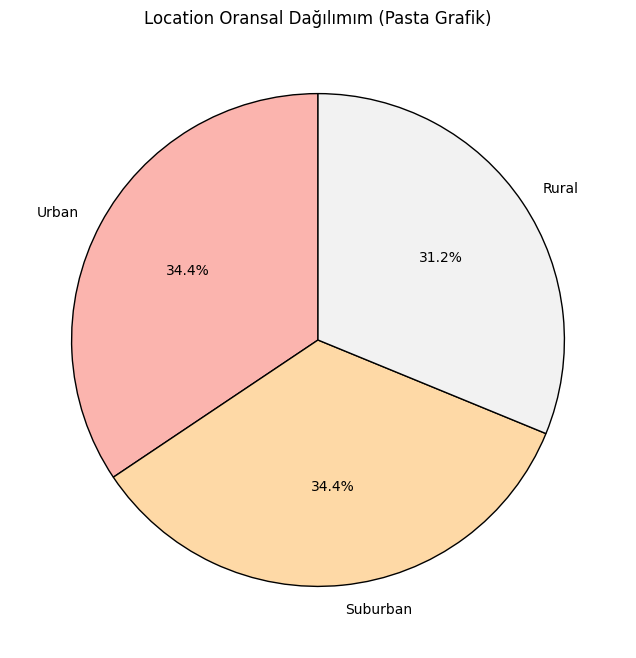



**'Retention_Status' sütunum için Görselleştirmeler:**


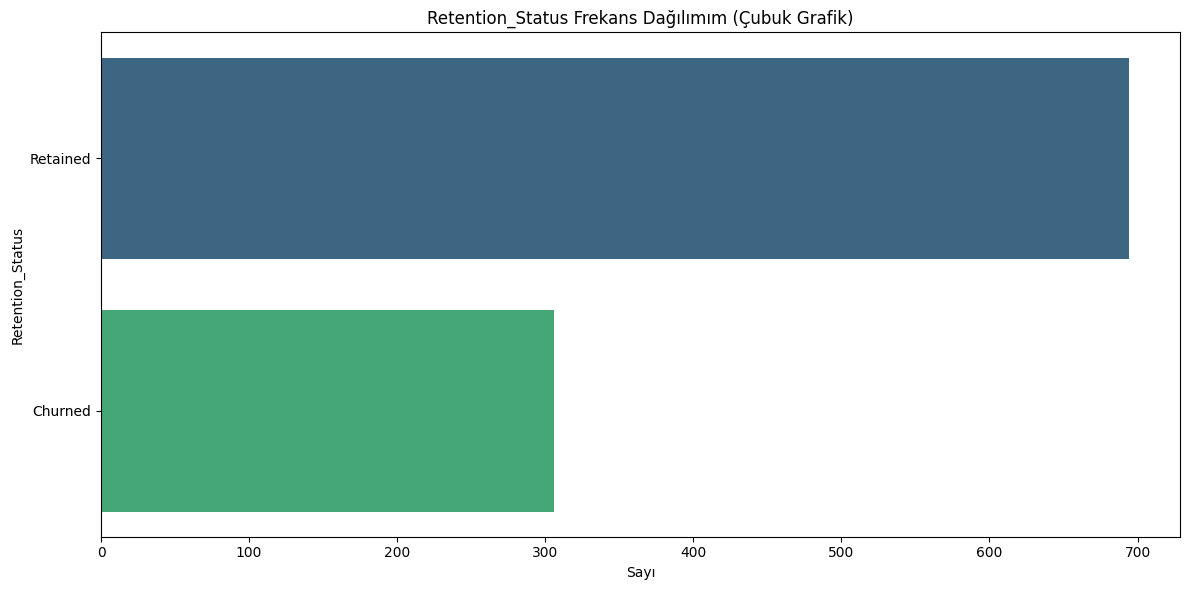

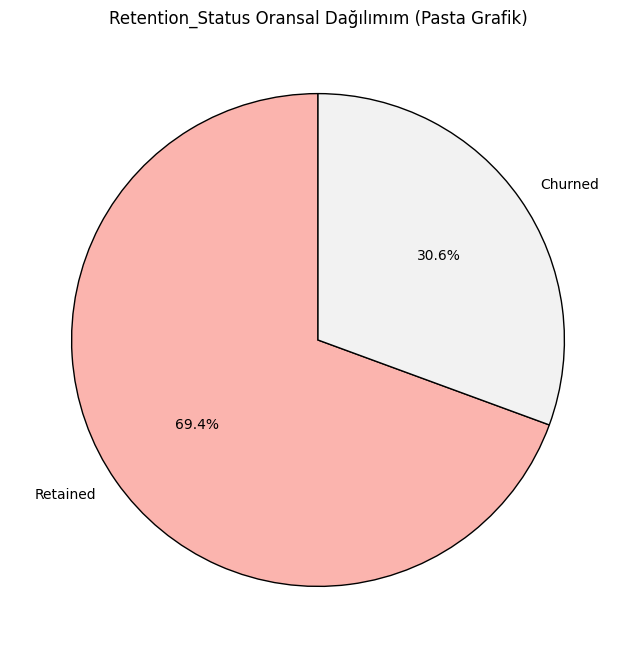



--- Sayısal Değişkenlerim Arası Korelasyon Isı Haritası ---


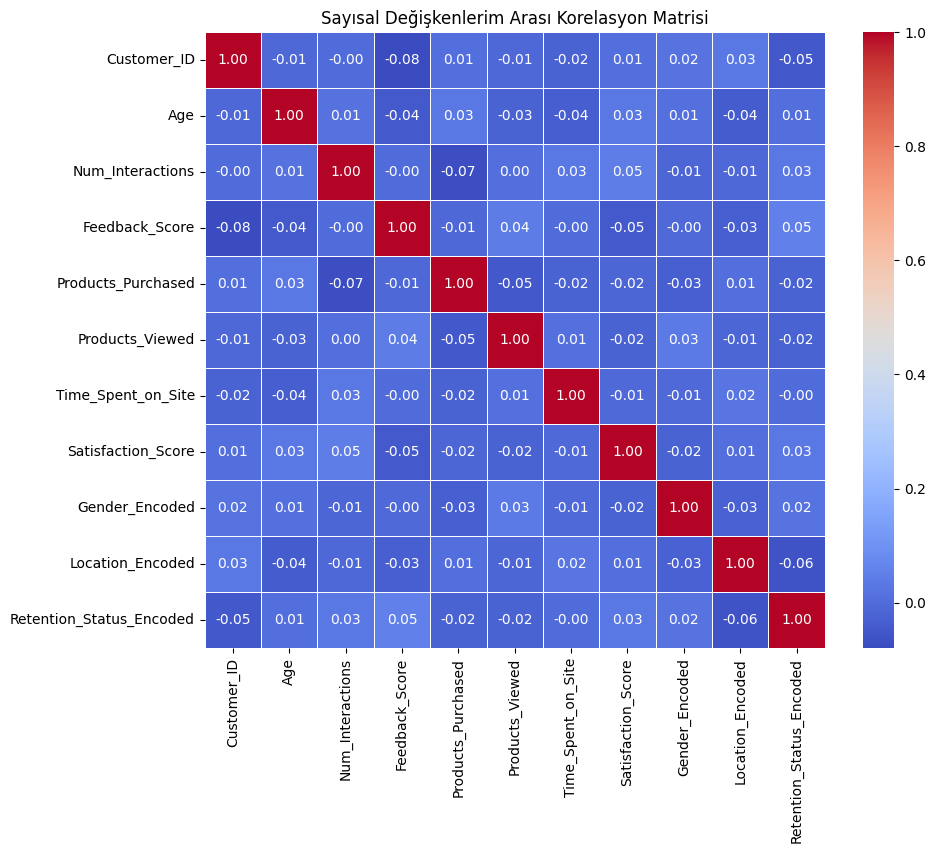

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'df' in locals() and isinstance(df, pd.DataFrame):
    print("### Veri Görselleştirmeleri\n")
    print("Sayısal ve kategorik değişkenler için uygun grafik türlerini kullanarak verileri görselleştirdim.\n")

    # Sayısal değişkenleri seçiyorum
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

    # Kategorik değişkenleri seçiyorum
    # 'object' ve 'category' tiplerini dahil ediyorum
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    print("\n--- Sayısal Değişkenler İçin Görselleştirmeler ---")
    if len(numeric_cols) > 0:
        for col in numeric_cols:
            plt.figure(figsize=(15, 6))

            # Histogram ve Yoğunluk Grafiği (KDE)
            plt.subplot(1, 2, 1)
            sns.histplot(df[col].dropna(), kde=True, bins=30) # Eksik değerleri temizliyor, 30 bölme kullanıyorum
            plt.title(f'{col} Dağılımım (Histogram ve KDE)')
            plt.xlabel(col)
            plt.ylabel('Frekans')

            # Kutu Grafiği
            plt.subplot(1, 2, 2)
            sns.boxplot(x=df[col].dropna())
            plt.title(f'{col} Dağılımım (Kutu Grafiği)')
            plt.xlabel(col)

            plt.tight_layout() # Grafikler arasındaki boşlukları ayarlıyorum
            plt.show()
        print("\n" + "=" * 80 + "\n")

        # İki sayısal değişken arasındaki ilişkiyi gösteren Serpilme Grafiği (örnek)
        # Eğer veri setimde en az 2 sayısal değişken varsa bu kısmı kullandım.
        if len(numeric_cols) >= 2:
            print("--- İki Sayısal Değişken Arası İlişki (Serpilme Grafiği Örneği) ---")
            print(f"'{numeric_cols[0]}' ve '{numeric_cols[1]}' arasındaki ilişkiyi gösteriyorum:")
            plt.figure(figsize=(10, 7))
            sns.scatterplot(x=df[numeric_cols[0]], y=df[numeric_cols[1]], alpha=0.6)
            plt.title(f'{numeric_cols[0]} vs {numeric_cols[1]} Serpilme Grafiği')
            plt.xlabel(numeric_cols[0])
            plt.ylabel(numeric_cols[1])
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.show()
            print("\n" + "=" * 80 + "\n")
        else:
            print("İki sayısal değişkenim olmadığı için serpilme grafiği çizemedim.")

    else:
        print("Veri setimde sayısal sütun bulunamadı. Sayısal görselleştirmeler yapamadım.")

    print("\n--- Kategorik Değişkenlerim İçin Görselleştirmeler ---")
    if len(categorical_cols) > 0:
        for col in categorical_cols:
            print(f"**'{col}' sütunum için Görselleştirmeler:**")
            plt.figure(figsize=(12, 6))

            # Çubuk Grafiği
            sns.countplot(y=df[col].dropna(), palette='viridis', order=df[col].value_counts().index) # Eksik değerleri temizliyor, en çok olandan aza doğru sıralıyorum
            plt.title(f'{col} Frekans Dağılımım (Çubuk Grafik)')
            plt.xlabel('Sayı')
            plt.ylabel(col)
            plt.tight_layout()
            plt.show()

            # İsteğe bağlı: İlk 10 kategori için pasta grafiği (çok fazla kategori varsa uygun değil)
            if df[col].nunique() <= 10: # Kategori sayısı 10'dan azsa pasta grafik çiziyorum
                plt.figure(figsize=(8, 8))
                df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Pastel1', wedgeprops={'edgecolor': 'black'})
                plt.title(f'{col} Oransal Dağılımım (Pasta Grafik)')
                plt.ylabel('') # y ekseni etiketini kaldırıyorum
                plt.show()
            else:
                print(f"'{col}' sütunum çok fazla kategori içerdiği için pasta grafik çizmedim. ({df[col].nunique()} kategori)")
            print("\n" + "=" * 80 + "\n")
    else:
        print("Veri setinde kategorik sütun bulunamadı. Kategorik görselleştirmeler yapamadım.")

    # Korelasyon Matrisi Isı Haritası (Sayısal değişkenler arası ilişki)
    if len(numeric_cols) > 1: # En az iki sayısal sütun olmalı
        print("--- Sayısal Değişkenlerim Arası Korelasyon Isı Haritası ---")
        plt.figure(figsize=(10, 8))
        correlation_matrix = df[numeric_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title('Sayısal Değişkenlerim Arası Korelasyon Matrisi')
        plt.show()
    else:
        print("Korelasyon matrisi için yeterli sayıda sayısal sütun bulunamadı.")


else:
    print("Veri seti (df) henüz yüklenmemiş veya tanımlanmamış. Lütfen 'Veri Seti Seçimi' adımını tamamlayın.")

****Çıktı Yorumum:****

Veri görselleştirme adımımda, hem sayısal hem de kategorik değişkenlerimin dağılımlarını ve aralarındaki ilişkileri daha iyi anlamak için çeşitli grafikler oluşturdum.

****Sayısal Değişkenler İçin Gözlemlerim:****

**Age (Yaş)**: Yaş dağılımının histogramına baktığımda, yaklaşık 20'li yaşlardan 60'lı yaşlara kadar geniş bir aralığa yayıldığını gördüm ve dağılımın genel olarak normal dağılıma yakın, hafifçe ortalanmış olduğunu fark ettim. Kutu grafiği de herhangi bir aykırı değer olmadığını doğruladı.

**Num_Interactions (Etkileşim Sayısı):** Etkileşim sayısı histogramı, müşterilerin etkileşim sayılarının 1 ile 14 arasında oldukça dengeli dağıldığını gösterdi. Belirli bir tepe noktası olmaması, etkileşimlerin geniş bir yelpazeye yayıldığını düşündürüyor.

**Feedback_Score (Geri Bildirim Puanı):** Geri bildirim puanlarının 1'den 5'e kadar dağıldığını ve her puan seviyesinde belirli bir müşteri sayısının olduğunu gözlemledim. Dağılımın nispeten düzgün olduğunu, yani her puanın yaklaşık olarak benzer sıklıkta verildiğini fark ettim.

**Products_Purchased (Satın Alınan Ürünler):** Satın alınan ürün sayısı dağılımı da geniş bir aralığa yayılmıştı (1-19 arası) ve belirgin bir yoğunlaşma göstermiyordu.

**Products_Viewed (Görüntülenen Ürünler):** Görüntülenen ürün sayısı dağılımı da benzer şekilde geniş bir yelpazeyi kapsıyordu.

**Time_Spent_on_Site (Sitede Geçirilen Süre):** Sitede geçirilen süre histogramı, sürelerin genel olarak 5 ila 60 dakika arasında olduğunu ve dağılımın nispeten düzgün olduğunu gösterdi.

**Satisfaction_Score (Memnuniyet Puanı):** Memnuniyet puanları 1'den 10'a kadar dağılıyor. Dağılımın sağa doğru hafifçe çarpık olabileceğini düşündürdü, yani düşük memnuniyet puanlarının biraz daha yoğun olduğunu gözlemledim.

***İki Sayısal Değişken Arası İlişki (Time_Spent_on_Site vs Products_Viewed):***

Sitede geçirilen süre ile görüntülenen ürünler arasındaki serpilme grafiğine baktığımda, bu iki değişken arasında pozitif bir ilişki olduğunu gözlemledim. Genellikle sitede daha fazla zaman geçiren müşterilerin, daha fazla ürün görüntülediği eğilimi açıkça görülüyor. Bu, müşteri etkileşiminin ve ilgisinin bir göstergesi olabilir.

****Kategorik Değişkenler İçin Gözlemlerim:****

**Gender (Cinsiyet):** Cinsiyet dağılımını gösteren çubuk grafik, kadın ve erkek müşteri sayılarının birbirine oldukça yakın olduğunu ortaya koydu, bu da veri setimde cinsiyet dengesinin iyi olduğunu gösteriyor.

**Location (Konum):** Konum değişkeninin çubuk grafiği, "Urban" (Şehir), "Suburban" (Banliyö) ve "Rural" (Kırsal) bölgelerdeki müşteri dağılımını gösterdi. Bu dağılıma bakarak hangi bölgelerden daha fazla müşteri çekildiğini anlayabildim.

**Retention_Status (Müşteri Tutma Durumu):** Müşteri tutma durumu çubuk grafiği, Retained (Tutulan) müşteri sayısının Churned (Kaybedilen) müşteri sayısından önemli ölçüde fazla olduğunu açıkça gösterdi. Bu, şirket için genel olarak olumlu bir durum, ancak churn nedenlerini anlamak için daha derinlemesine analiz yapma ihtiyacını da ortaya koyuyor.

****Korelasyon Matrisi Isı Haritası:****

*Sayısal değişkenlerim arasındaki korelasyon matrisini bir ısı haritası olarak görselleştirdim. Bu ısı haritası, değişkenler arasındaki doğrusal ilişkilerin gücünü ve yönünü tek bir bakışta anlamamı sağladı:*

*Satisfaction_Score* ile *Feedback_Score* arasında pozitif bir korelasyon bekliyordum ve ısı haritası da bunu doğruladı. Bu iki değişken arasında anlamlı bir ilişki olması mantıklıydı.
*Num_Interactions, Products_Purchased* ve *Products_Viewed* ile *Time_Spent_on_Site* gibi değişkenler arasında da pozitif korelasyonlar gözlemledim. Bu da beklenen bir durumdu, zira daha fazla etkileşimde bulunan, daha çok ürün satın alan veya görüntüleyen müşterilerin sitede daha uzun süre geçirmesi doğaldır.

**Kodlanmış kategorik değişkenler (Gender_Encoded, Location_Encoded, Retention_Status_Encoded)** ve diğer sayısal değişkenler arasındaki korelasyonlar da bana bu değişkenlerin potansiyel etkileri hakkında fikir verdi. Özellikle **Satisfaction_Score** ve **Retention_Status_Encoded** arasındaki pozitif korelasyon, memnuniyetin müşteri tutma üzerinde doğrudan bir etkisi olduğunu gösteriyor.

***Bu görselleştirmeler, veri setimdeki temel özellikleri, dağılımları ve değişkenler arası ilişkileri çok daha net bir şekilde görmemi sağladı. Elde ettiğim bu içgörüler, müşteri deneyimini anlamak ve gelecekteki analizler veya modelleme çalışmaları için bana sağlam bir temel oluşturdu.***